**Import Libraries and Packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential


In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
import tensorflow as tf
import seaborn as sns

# from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from tensorflow import keras
import joblib

In [ ]:
import math
import datetime as dt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM, GRU

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

**Reading Dataset**

In [ ]:
file_path = "/content/GOOG.csv"
true_df = pd.read_csv(file_path)

In [ ]:
true_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.615220,15.678981,15.547723,15.610239,15.610239,78541293
1,2010-01-05,15.620949,15.637387,15.480475,15.541497,15.541497,120638494
2,2010-01-06,15.588072,15.588072,15.102393,15.149715,15.149715,159744526
3,2010-01-07,15.178109,15.193053,14.760922,14.797037,14.797037,257533695
4,2010-01-08,14.744733,15.024933,14.672753,14.994298,14.994298,189680313
...,...,...,...,...,...,...,...
3544,2024-02-02,140.889999,143.880005,138.169998,143.539993,143.539993,42116900
3545,2024-02-05,144.039993,146.669998,143.910004,144.929993,144.929993,29254400
3546,2024-02-06,145.960007,146.740005,144.520004,145.410004,145.410004,21517700
3547,2024-02-07,146.119995,147.000000,145.210007,146.679993,146.679993,21436100


**Checking Null and NA Value**

In [ ]:
print("Null values:", true_df.isnull().values.sum())
print("NA values:", true_df.isna().values.any())

Null values: 0
NA values: False


In [ ]:
true_df = true_df.dropna()

In [ ]:
true_df=true_df.drop_duplicates()

In [ ]:
true_df.columns.values

array(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'],
      dtype=object)

In [ ]:
true_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.615220,15.678981,15.547723,15.610239,15.610239,78541293
1,2010-01-05,15.620949,15.637387,15.480475,15.541497,15.541497,120638494
2,2010-01-06,15.588072,15.588072,15.102393,15.149715,15.149715,159744526
3,2010-01-07,15.178109,15.193053,14.760922,14.797037,14.797037,257533695
4,2010-01-08,14.744733,15.024933,14.672753,14.994298,14.994298,189680313


In [ ]:
print("Total number of days: ",true_df.shape[0])
print("Total number of fields: ",true_df.shape[1])

Total number of days:  3549
Total number of fields:  7


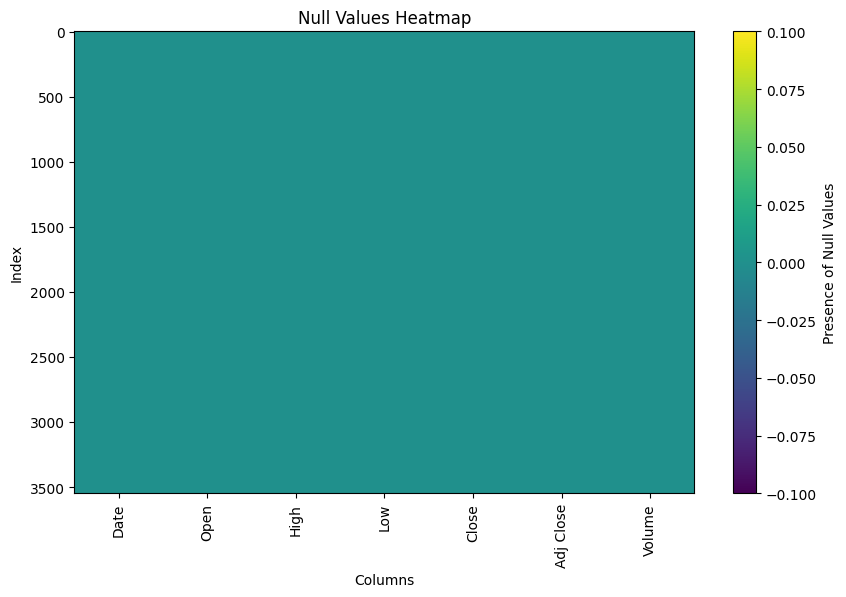

In [ ]:
# Plotting null values in the dataset
plt.figure(figsize=(10, 6))
plt.title("Null Values Heatmap")
plt.xlabel("Columns")
plt.ylabel("Index")
plt.imshow(true_df.isnull(), aspect='auto', cmap='viridis')
plt.colorbar(label='Presence of Null Values')
plt.xticks(ticks=range(true_df.shape[1]), labels=true_df.columns.values, rotation='vertical')
plt.show()

**Convert Date field into Datetime format**

In [ ]:
true_df['Date'] = pd.to_datetime(true_df.Date)
true_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.615220,15.678981,15.547723,15.610239,15.610239,78541293
1,2010-01-05,15.620949,15.637387,15.480475,15.541497,15.541497,120638494
2,2010-01-06,15.588072,15.588072,15.102393,15.149715,15.149715,159744526
3,2010-01-07,15.178109,15.193053,14.760922,14.797037,14.797037,257533695
4,2010-01-08,14.744733,15.024933,14.672753,14.994298,14.994298,189680313


**Exploratory Data Analysis**

Finding the duration of dataset

In [ ]:
print("Starting date: ",true_df.iloc[0][0])
print("Ending date: ", true_df.iloc[-1][0])
print("Duration: ", true_df.iloc[-1][0]-true_df.iloc[0][0])

Starting date:  2010-01-04 00:00:00
Ending date:  2024-02-08 00:00:00
Duration:  5148 days 00:00:00


Comparing the opening and closing stock prices on a month-to-month basis

In [ ]:
monthvise= true_df.groupby(true_df['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,56.233229,56.307930
February,52.992717,53.006242
March,51.211294,51.255739
April,51.051579,50.999535
May,51.710784,51.825673
June,52.941915,52.950310
July,54.274529,54.398388
August,56.888716,56.934326
September,56.435312,56.369698


<ipython-input-18-5cefc0798f66>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(true_df, x=true_df[column], color='#75f8f2')
<ipython-input-18-5cefc0798f66>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(true_df, x=true_df[column], color='#75f8f2')
<ipython-input-18-5cefc0798f66>:8: UserWarni

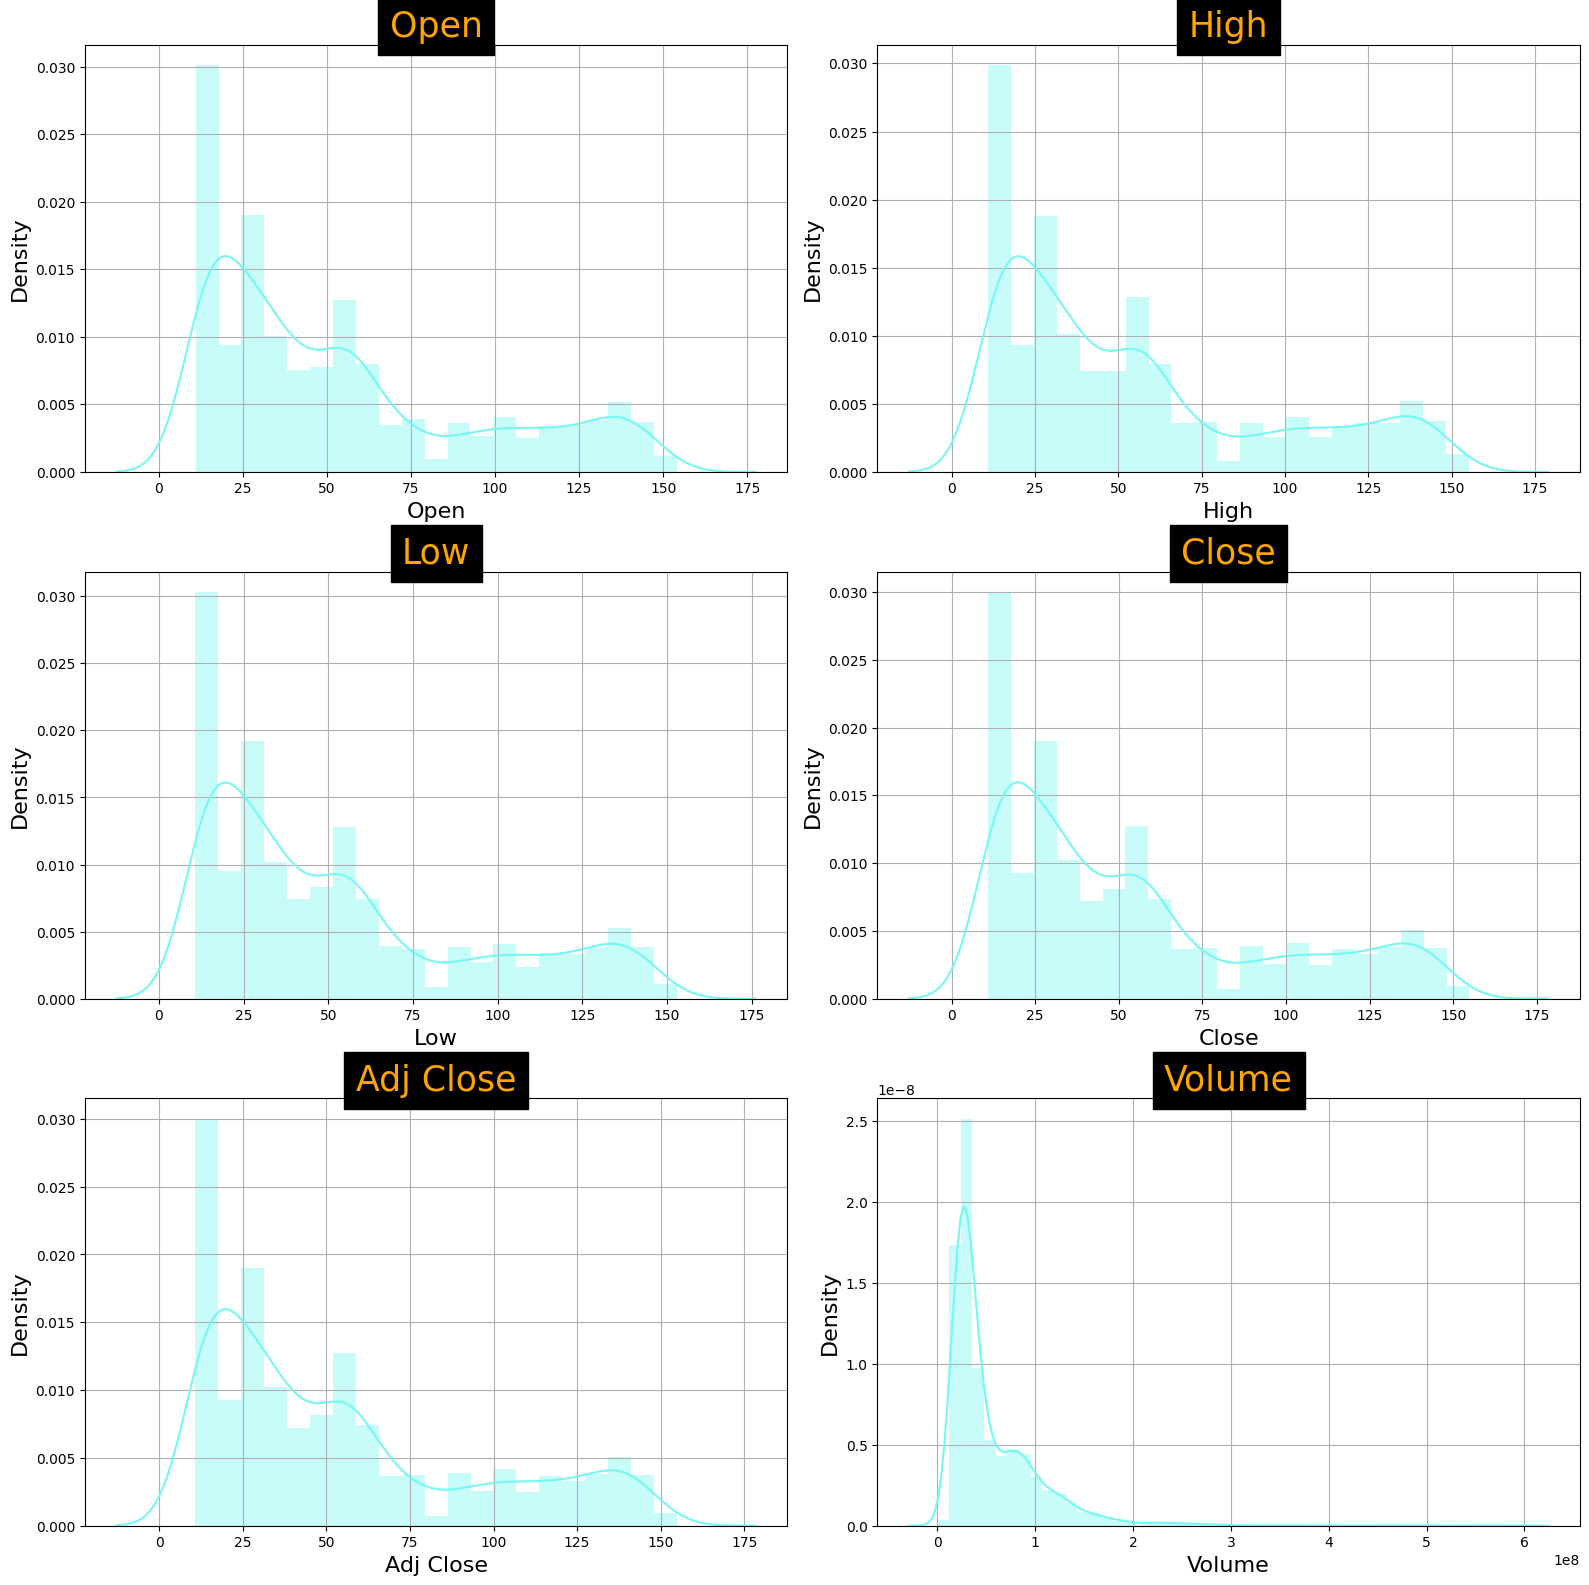

In [ ]:
# Checking distribution

features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
sns.set_palette("PiYG")
plt.figure(figsize=(16,26))
for idx, column in enumerate(features):
    plt.subplot(5, 2, idx + 1)
    sns.distplot(true_df, x=true_df[column], color='#75f8f2')
    plt.title(column, backgroundcolor='black', color='orange', fontsize=25)
    plt.xticks()
    plt.xlabel(column, fontsize=16)
    plt.ylabel('Density', fontsize=16)
    plt.grid()

plt.tight_layout()
plt.show()

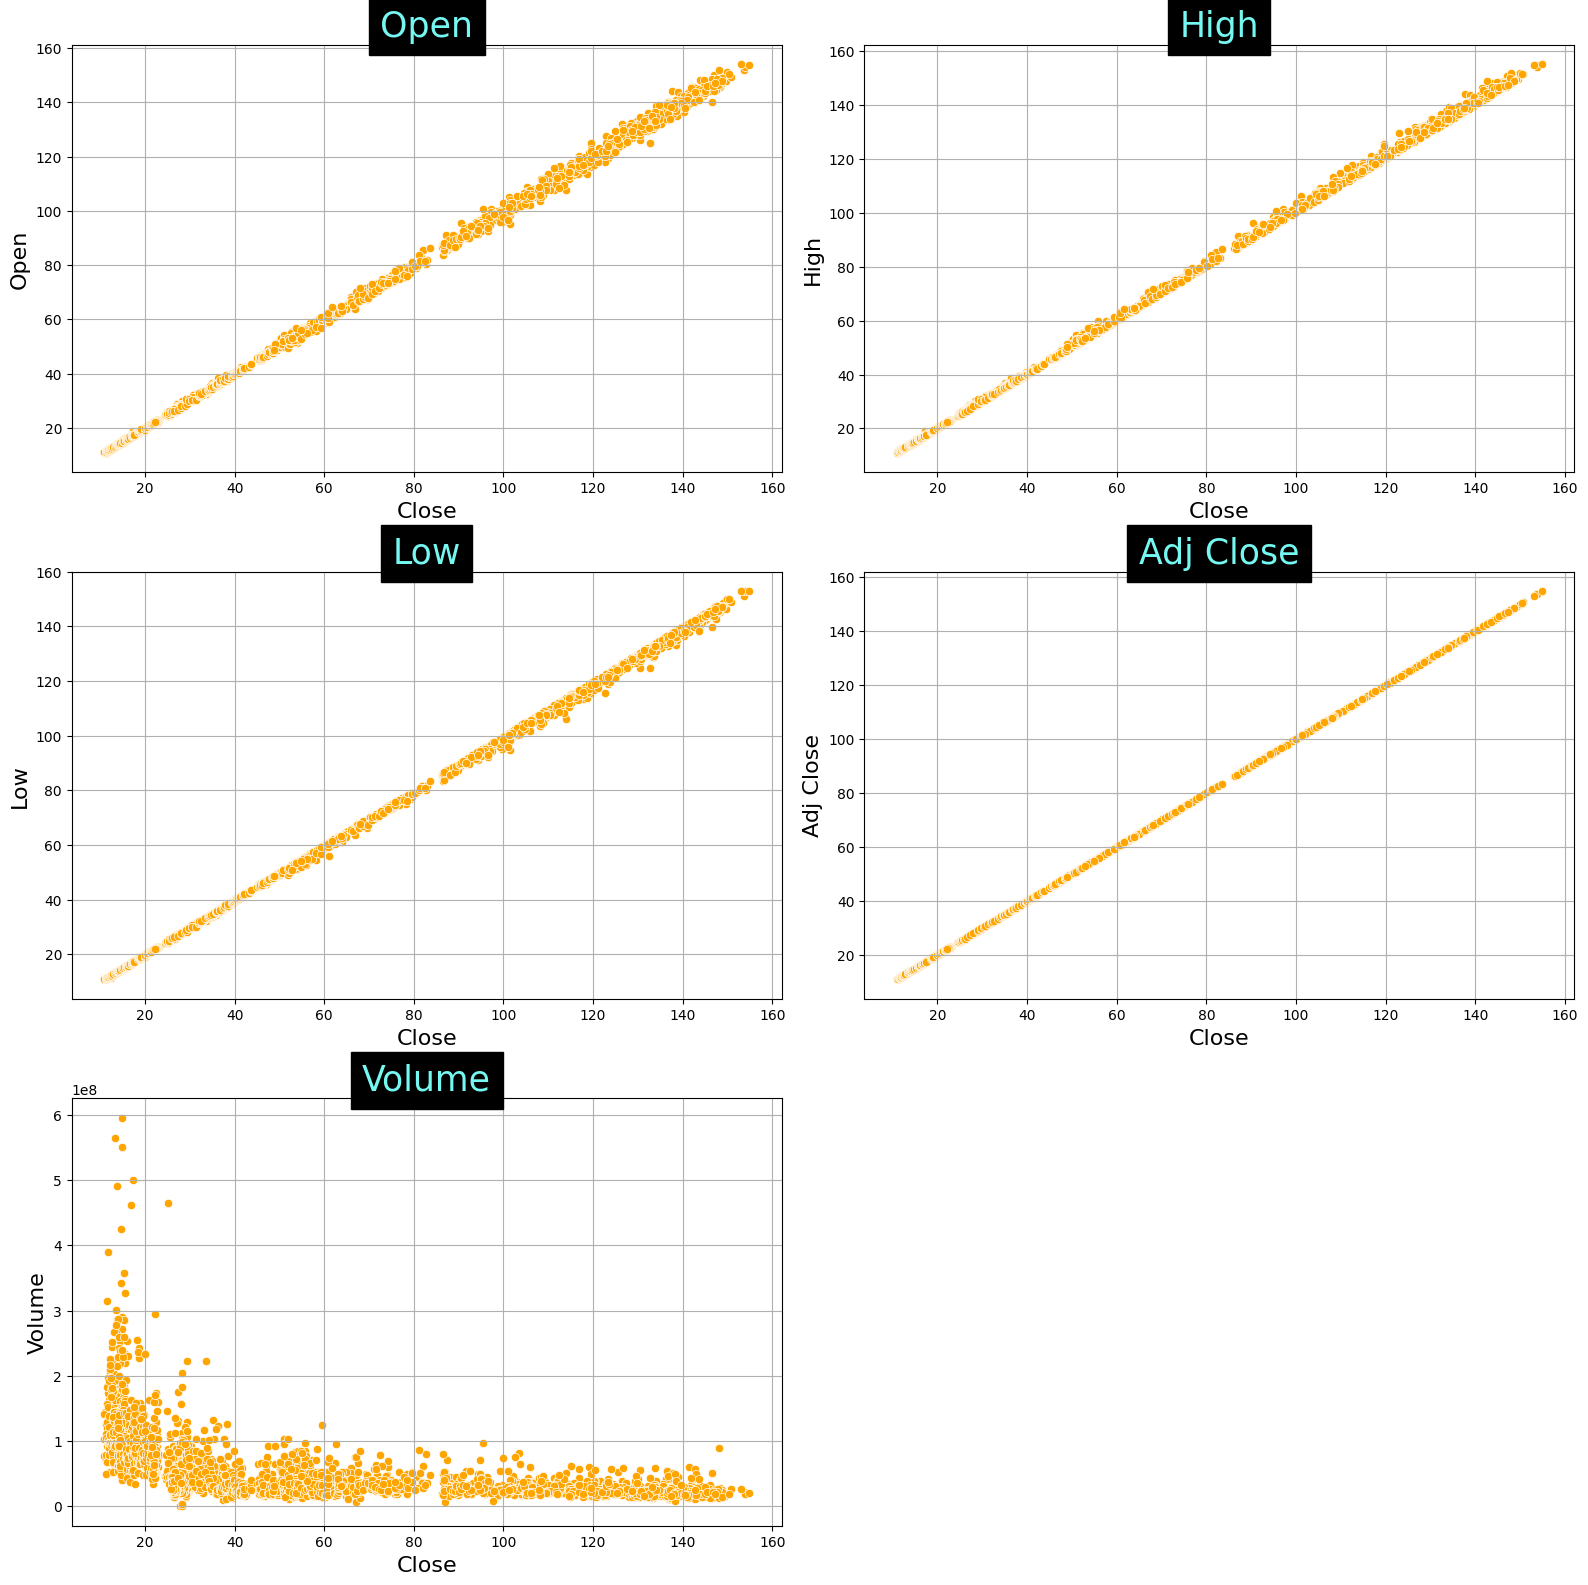

In [ ]:
# Examining how different features relate to the 'close' price.
features = ['Open', 'High', 'Low', 'Adj Close', 'Volume']
sns.set_palette("PiYG")
plt.figure(figsize=(16,26))
for idx, column in enumerate(features):
    plt.subplot(5, 2,  idx + 1)
    sns.scatterplot(x =true_df['Close'], y=true_df[column] , data = true_df, color='orange')
    plt.title(column, backgroundcolor='black', color='#75f8f2', fontsize=25)
    plt.xlabel('Close', fontsize=16)
    plt.ylabel(column, fontsize=16)
    plt.grid()
plt.tight_layout()
plt.show()

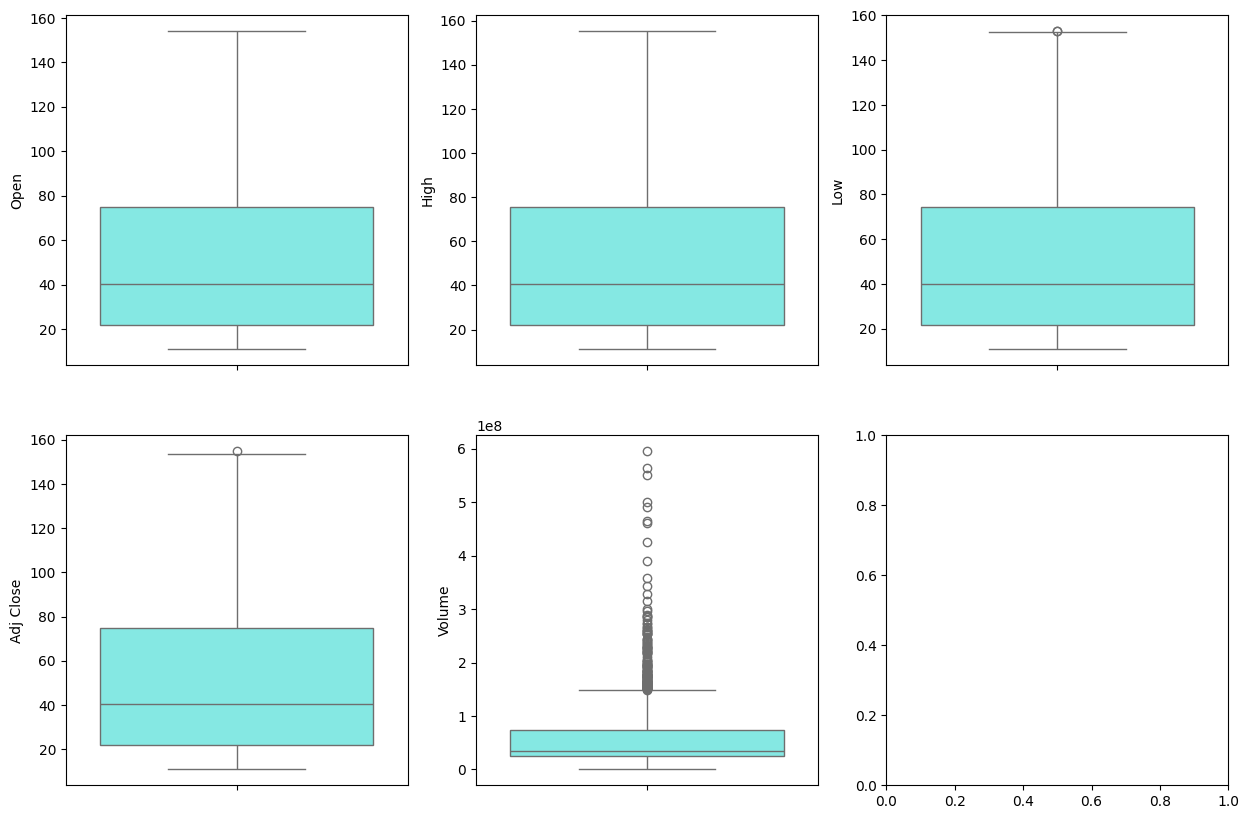

In [ ]:
# Subplot
features = ['Open', 'High', 'Low', 'Adj Close', 'Volume']
fig  = plt.subplots(nrows = 2, ncols = 3,figsize = (15,10))
for i in range(len(features)) :
    plt.subplot(2,3,i+1)
    ax = sns.boxplot(true_df[features[i]], color="#75f8f2")

plt.show()

In [ ]:
df1 = true_df[['Date', 'Close']].copy()

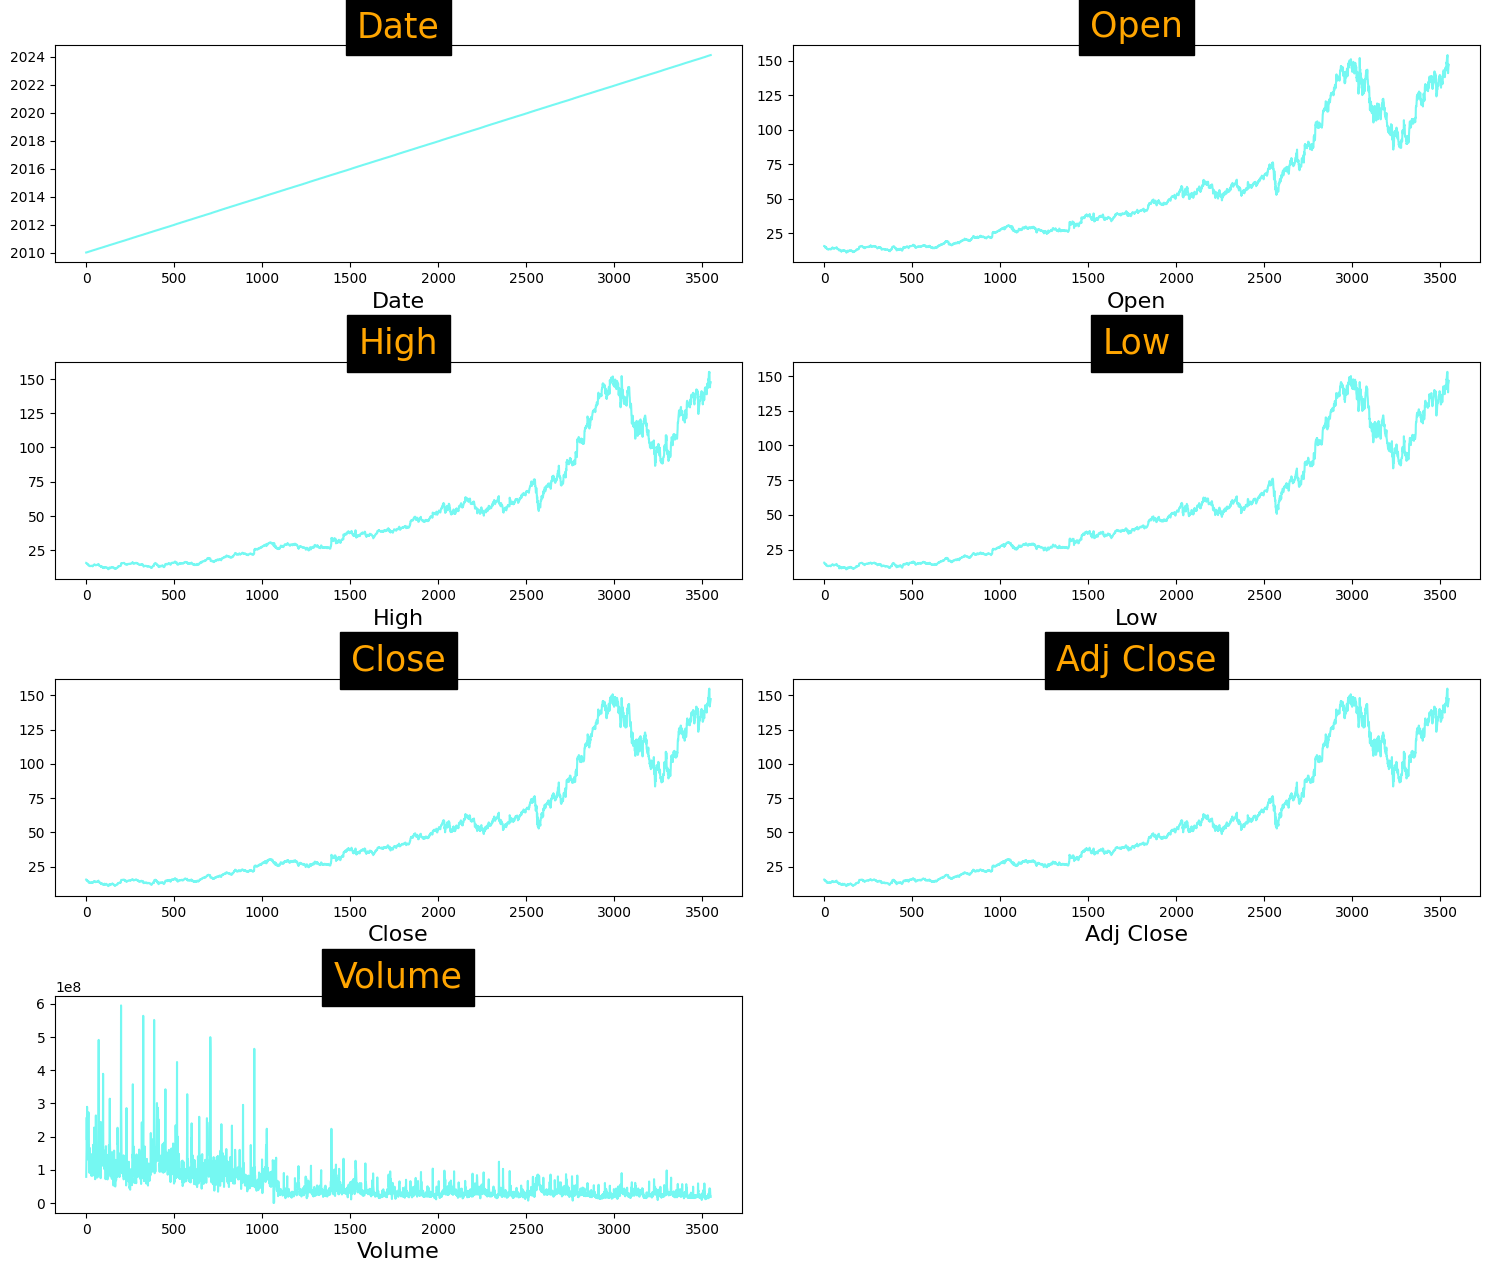

In [ ]:
#Trend Analysis of Stock Features
plt.figure(figsize = (15,25))
for idx, i in enumerate(true_df):
    plt.subplot(8, 2, idx + 1)
    plt.plot(true_df.index.values,true_df[i], color='#75f8f2')
    plt.title(i,backgroundcolor='black',color='orange',fontsize=25)
    plt.xlabel(i, size = 16)
plt.tight_layout()
plt.show()

In [ ]:
# New Style
plt.style.use("fivethirtyeight")

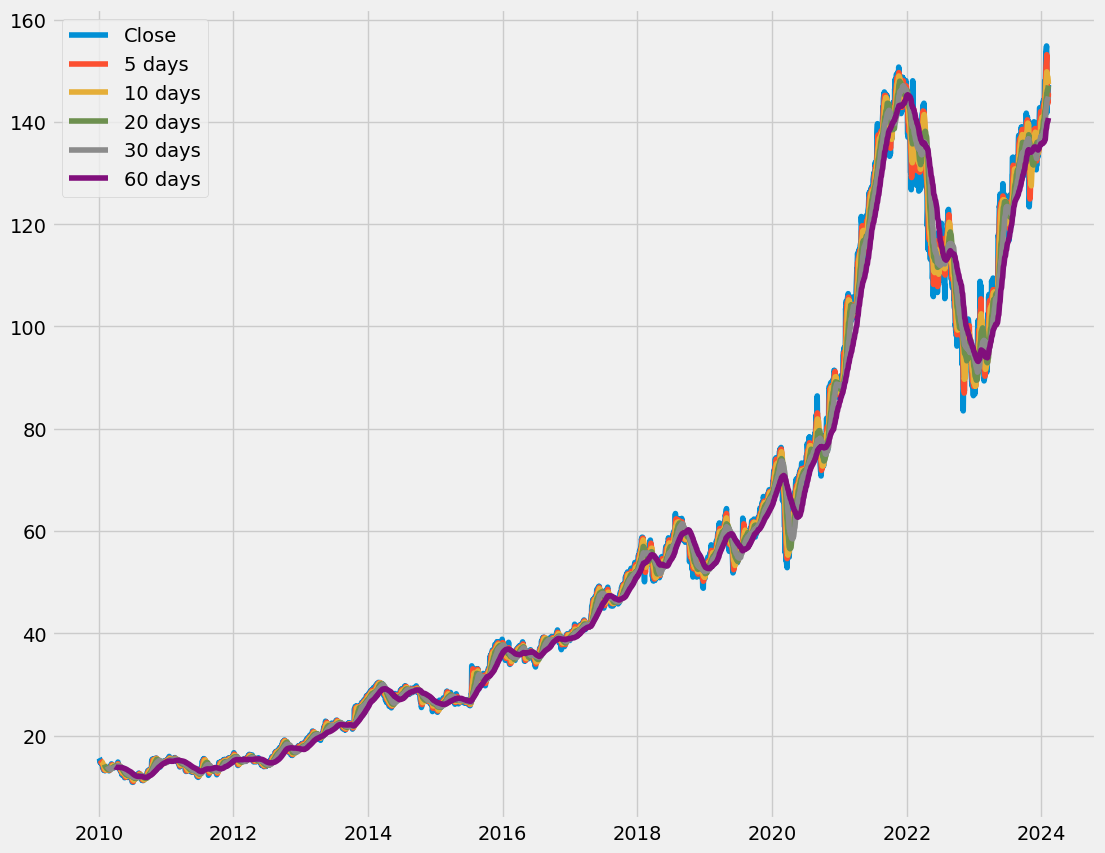

In [ ]:
# Checking and choosing the best time step
ma_days = [5, 10, 20, 30, 60]

for MA in ma_days:
    column_name = f"MA in {MA} days"
    true_df[column_name] = true_df['Close'].rolling(MA).mean()

plt.figure(figsize=(12,10))

plt.plot(true_df['Date'],true_df['Close'],label='Close')
plt.plot(true_df['Date'],true_df['MA in 5 days'],label= '5 days')
plt.plot(true_df['Date'],true_df['MA in 10 days'],label= '10 days')
plt.plot(true_df['Date'],true_df['MA in 20 days'],label= '20 days')
plt.plot(true_df['Date'],true_df['MA in 30 days'],label= '30 days')
plt.plot(true_df['Date'],true_df['MA in 60 days'],label= '60 days')
plt.legend()
plt.show()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close price')
fig.show()

Compare the highest and lowest stock prices on a monthly basis

In [ ]:
true_df.groupby(true_df['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = true_df.groupby(true_df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = true_df.groupby(true_df['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low stock price')
fig.show()

Compare the trends of stock open, close, high, and low prices

In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(true_df, x=true_df.Date, y=[true_df['Open'], true_df['Close'],
                                          true_df['High'], true_df['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock Analysis Chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

Predict Close Price for next 30 Days

In [ ]:
#Make separate dataframe of close price
closedf = true_df[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (3549, 2)



Plotting Stock Close price chart

In [ ]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'Date':'Date','Close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8)
fig.update_layout(title_text='Stock close price chart', plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
#Using data from the past year for making predictions.
closedf = closedf[closedf['Date'] > '2022-08-16']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  372


In [ ]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'Date':'Date','Close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Stock close price', plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# **Preparing Dataset**

Normalizing

In [ ]:
# Copy from true_df
df2= true_df.copy()

In [ ]:
# Normalize the data to create training and testing datasets using a new DataFrame containing only the 'Close' column
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
# fit scaler on only one column('Close')
scaled = scaler.fit_transform(df2.filter(['Close']))
# now have a scaled dataframe with 'Close column'
df3=pd.DataFrame(scaled, columns=['Close'])

In [ ]:
# Summary Statistics Transposed
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
Close,3549.0,0.304461,0.279113,0.0,0.076722,0.204519,0.445509,1.0


In [ ]:
#Analyzing the distribution of the test and train divisions
#Determining the size of the training dataset by selecting 80% of the total number of rows
new_dataset_length = int(np.ceil( len(df2.filter(['Close']).values) * .8 ))
print('Length of 80% of Dataset is ',new_dataset_length, ' and, the test data length is ',len(df2.Close) - new_dataset_length)

Length of 80% of Dataset is  2840  and, the test data length is  709


## **Generating training and testing datasets from the 'Close' column**

In [ ]:
# Create the training data set with 20 time steps
# finding the best time step from MA that 20 was the most optimal

train = scaled[0:int(new_dataset_length), :]

time_step = 20

X_train = []
y_train = []

for i in range(time_step, len(train)):
    X_train.append(train[i-time_step:i, 0])
    y_train.append(train[i, 0])
    if i<= (time_step+1):
        print(X_train)
        print(y_train)
        print()

[array([0.03298537, 0.03250792, 0.02978682, 0.02733731, 0.02870738,
       0.02854996, 0.02671109, 0.02612466, 0.02660211, 0.02489817,
       0.02621635, 0.0249691 , 0.02541368, 0.01971026, 0.01797866,
       0.01839729, 0.01834193, 0.01699089, 0.01623839, 0.01677119])]
[0.016442520947297326]

[array([0.03298537, 0.03250792, 0.02978682, 0.02733731, 0.02870738,
       0.02854996, 0.02671109, 0.02612466, 0.02660211, 0.02489817,
       0.02621635, 0.0249691 , 0.02541368, 0.01971026, 0.01797866,
       0.01839729, 0.01834193, 0.01699089, 0.01623839, 0.01677119]), array([0.03250792, 0.02978682, 0.02733731, 0.02870738, 0.02854996,
       0.02671109, 0.02612466, 0.02660211, 0.02489817, 0.02621635,
       0.0249691 , 0.02541368, 0.01971026, 0.01797866, 0.01839729,
       0.01834193, 0.01699089, 0.01623839, 0.01677119, 0.01644252])]
[0.016442520947297326, 0.018120502276735492]



In [ ]:
# Converting the X_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Reshape the X_train
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
# Creating the test dataset
test = scaled[new_dataset_length-time_step:, :]

In [ ]:
# Creating DataSets of y_test
y_test =  np.array(scaler.inverse_transform(df3))[new_dataset_length:, :]

In [ ]:
# Creating dataset of X_test
X_test = []
for i in range(time_step, len(test)):
    X_test.append(test[i-time_step:i, 0])

In [ ]:
# Converting dataset to a numpy array
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
# Reshaping the data for learning in RNN model
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1 ))

# **Constructing a model using LSTM (Long Short-Term Memory)**

In [ ]:
# Building a Recurrent Neural Network (RNN)
RNN1 = tf.keras.models.Sequential()

In [ ]:
# Setting up the initial LSTM layer
RNN1.add(tf.keras.layers.LSTM(units=130, return_sequences=True, input_shape=(X_train.shape[1],1)))

In [ ]:
# Setting up the second LSTM layer.
RNN1.add(tf.keras.layers.LSTM(units=65, return_sequences=False))

In [ ]:
# The Connection
RNN1.add(tf.keras.layers.Dense(units=30))

In [ ]:
# The Output layer
RNN1.add(tf.keras.layers.Dense(units=1))

In [ ]:
# Compiling The RNN
RNN1.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

Fitting Model on The Train and Validation Dataset

In [ ]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(32,return_sequences=True,input_shape=(time_step,1)))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dropout(0.20))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 20, 32)            3360      
                                                                 
 gru_1 (GRU)                 (None, 20, 32)            6336      
                                                                 
 gru_2 (GRU)                 (None, 32)                6336      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 16065 (62.75 KB)
Trainable params: 16065 (62.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Fitting Model on The Train and Validation Dataset
Model_1 = RNN1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=32,verbose=1)

Epoch 1/10
89/89 [==============================] - 10s 61ms/step - loss: 0.0018 - accuracy: 3.5461e-04 - val_loss: 15228.8926 - val_accuracy: 0.0000e+00
Epoch 2/10
89/89 [==============================] - 5s 57ms/step - loss: 1.2902e-04 - accuracy: 3.5461e-04 - val_loss: 15226.6709 - val_accuracy: 0.0000e+00
Epoch 3/10
89/89 [==============================] - 4s 50ms/step - loss: 1.4828e-04 - accuracy: 3.5461e-04 - val_loss: 15224.8105 - val_accuracy: 0.0000e+00
Epoch 4/10
89/89 [==============================] - 6s 63ms/step - loss: 1.3632e-04 - accuracy: 3.5461e-04 - val_loss: 15225.7627 - val_accuracy: 0.0000e+00
Epoch 5/10
89/89 [==============================] - 4s 46ms/step - loss: 1.0487e-04 - accuracy: 3.5461e-04 - val_loss: 15231.2061 - val_accuracy: 0.0000e+00
Epoch 6/10
89/89 [==============================] - 4s 49ms/step - loss: 1.1409e-04 - accuracy: 3.5461e-04 - val_loss: 15230.6729 - val_accuracy: 0.0000e+00
Epoch 7/10
89/89 [==============================] - 6s 67ms/s

In [ ]:
# Geting The Model Predicted Price Values
predictions1 = RNN1.predict(X_test)
# Converting scaled number to actual number
predictions1 = scaler.inverse_transform(predictions1)

23/23 [==============================] - 1s 17ms/step


In [ ]:
# geting the score and error
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, predictions1)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, predictions1)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, predictions1))}')
print(f'R2_Score: {metrics.r2_score(y_test, predictions1)}')

Mean Absolute Error: 3.1531239109310265
Mean Squared Error: 16.632054468242163
Root Mean Squared Error: 4.078241590225151
R2_Score: 0.944153235145278


In [ ]:
# Change of style
plt.style.use("seaborn-v0_8-muted")

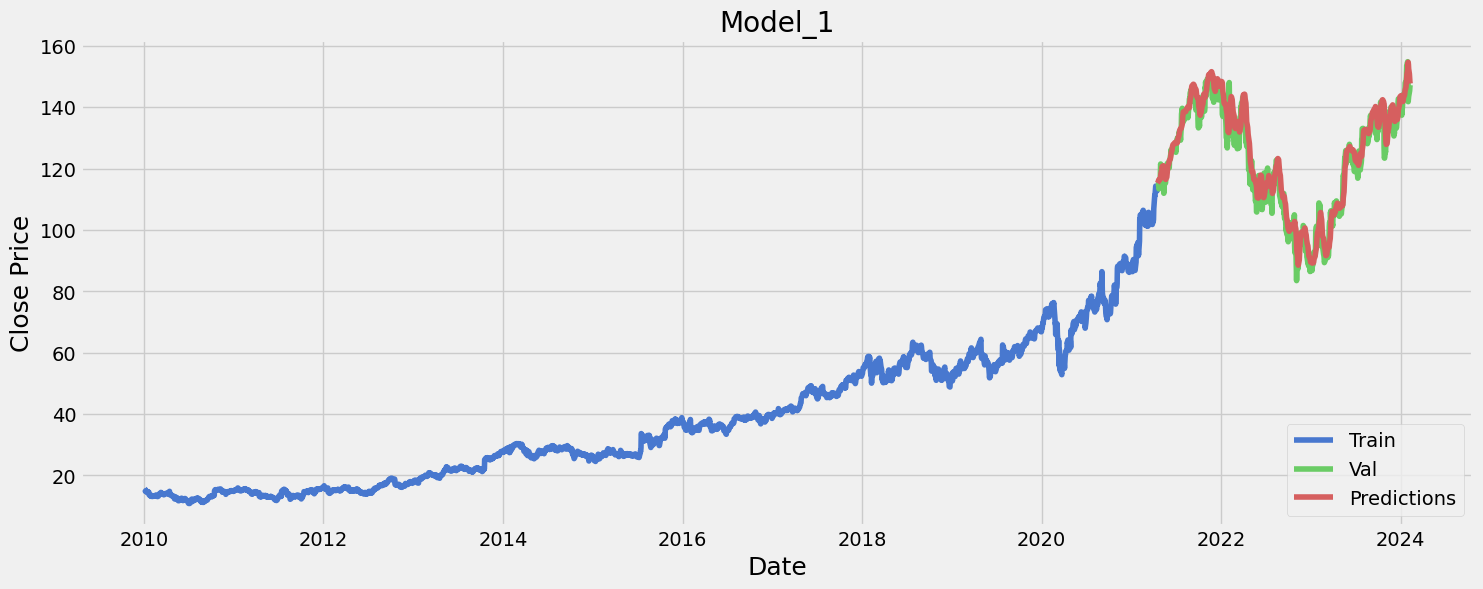

In [ ]:
# Create train and validation data from DataFrame
train = df2.filter(['Close'])[:new_dataset_length]
valid = df2.filter(['Close'])[new_dataset_length:]
valid['Predictions1'] = predictions1

# Visualizing the data
plt.figure(figsize=(16,6))
plt.title('Model_1')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(df1['Date'].iloc[:new_dataset_length], train['Close'])
plt.plot(df1['Date'].iloc[new_dataset_length:], valid[['Close', 'Predictions1']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# **Constructing a model using GRU (Gated Recurrent Unit)**

In [ ]:
# Creat RNN
RNN2 = tf.keras.models.Sequential()

In [ ]:
# The First GRU Layer
RNN2.add(tf.keras.layers.GRU(units=130, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))

In [ ]:
# The Second GRU Layer
RNN2.add(tf.keras.layers.GRU(units=65, return_sequences=False, activation='tanh'))

In [ ]:
# The Connection
RNN2.add(tf.keras.layers.Dense(units=30))

In [ ]:
# The Output layer
RNN2.add(tf.keras.layers.Dense(units=1))

In [ ]:
# Compiling The RNN
RNN2.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
# Compiling The RNN
RNN2.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
# Fitting Model on The Train and Validation Dataset
Model_2 = RNN2.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size=32, epochs=10)

Epoch 1/10
89/89 [==============================] - 11s 72ms/step - loss: 0.0026 - accuracy: 3.5461e-04 - val_loss: 15228.2529 - val_accuracy: 0.0000e+00
Epoch 2/10
89/89 [==============================] - 4s 41ms/step - loss: 6.1971e-05 - accuracy: 3.5461e-04 - val_loss: 15229.9053 - val_accuracy: 0.0000e+00
Epoch 3/10
89/89 [==============================] - 4s 49ms/step - loss: 5.8295e-05 - accuracy: 3.5461e-04 - val_loss: 15231.4883 - val_accuracy: 0.0000e+00
Epoch 4/10
89/89 [==============================] - 5s 52ms/step - loss: 5.5985e-05 - accuracy: 3.5461e-04 - val_loss: 15230.3047 - val_accuracy: 0.0000e+00
Epoch 5/10
89/89 [==============================] - 4s 50ms/step - loss: 5.2788e-05 - accuracy: 3.5461e-04 - val_loss: 15227.6992 - val_accuracy: 0.0000e+00
Epoch 6/10
89/89 [==============================] - 4s 49ms/step - loss: 6.6576e-05 - accuracy: 3.5461e-04 - val_loss: 15226.5615 - val_accuracy: 0.0000e+00
Epoch 7/10
89/89 [==============================] - 5s 51ms/s

In [ ]:
# Geting The Model Predicted Price Values
predictions2 = RNN2.predict(X_test)
# Converting scaled number to actual number
predictions2 = scaler.inverse_transform(predictions2)

23/23 [==============================] - 1s 13ms/step


In [ ]:
# geting the score and error
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, predictions2)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, predictions2)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, predictions2))}')
print(f'R2_Score: {metrics.r2_score(y_test, predictions2)}')

Mean Absolute Error: 2.499579546698007
Mean Squared Error: 10.601210610392707
Root Mean Squared Error: 3.255950031925046
R2_Score: 0.9644034765960842


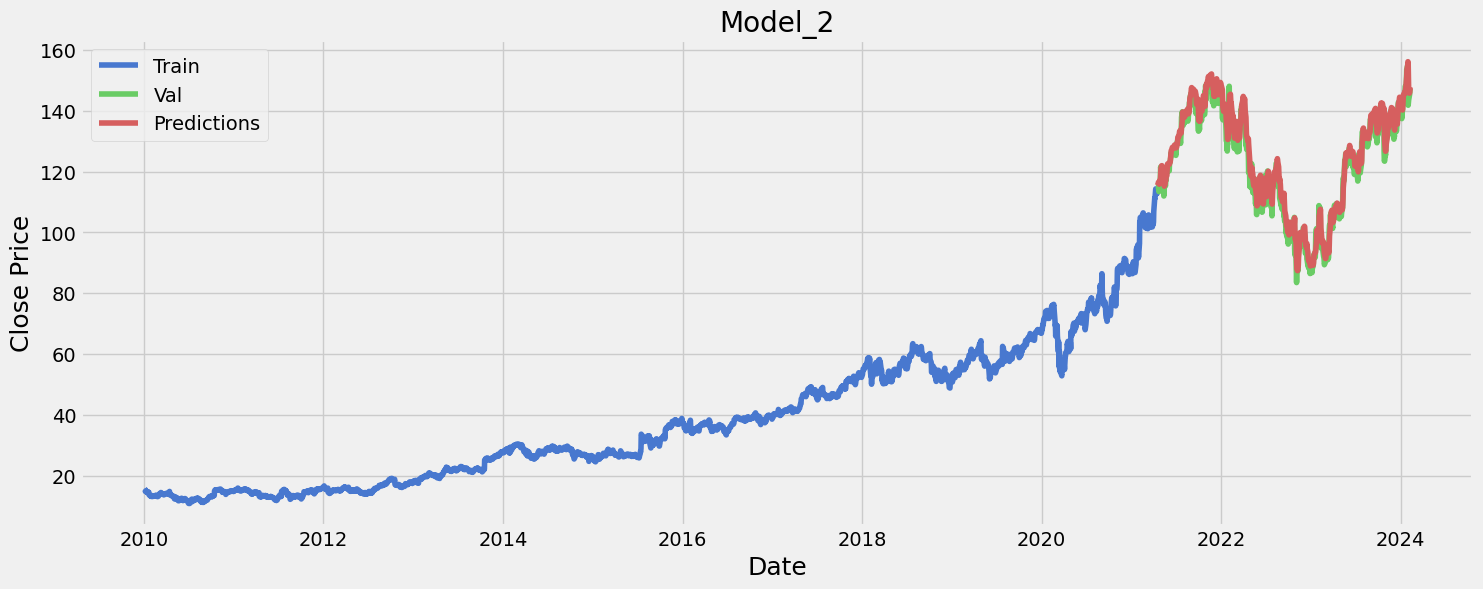

In [ ]:
# Assuming that df1 and df2 are defined correctly and include the necessary data
train_length = len(train['Close'])
valid_length = len(valid['Close'])


# Plotting the data
plt.figure(figsize=(16,6))
plt.title('Model_2')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)

# Make sure to only plot the dates that align with your training data
plt.plot(df1['Date'][:train_length], train['Close'])

# Similarly, ensure the dates for the validation set align with the validation data
plt.plot(df1['Date'][train_length:train_length + valid_length], valid[['Close', 'Predictions2']])

plt.legend(['Train', 'Val', 'Predictions'], loc='best')
plt.show()


**Comparision of Both the Models**

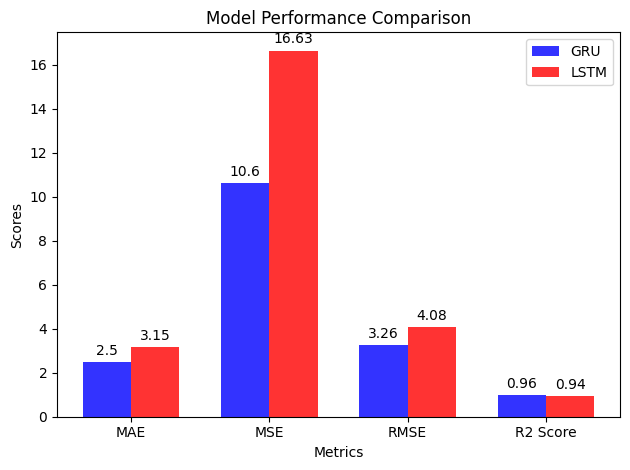

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for GRU
mae_gru = 2.499579546698007
mse_gru = 10.601210610392707
rmse_gru = 3.255950031925046
r2_gru = 0.9644034765960842

# Metrics for LSTM
mae_lstm = 3.1531239109310265
mse_lstm = 16.632054468242163
rmse_lstm = 4.078241590225151
r2_lstm = 0.944153235145278

# Indices of the metrics
n_groups = 4
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

# Values
gru_scores = [mae_gru, mse_gru, rmse_gru, r2_gru]
lstm_scores = [mae_lstm, mse_lstm, rmse_lstm, r2_lstm]

# Creating the bar chart
fig, ax = plt.subplots()
bar1 = ax.bar(index, gru_scores, bar_width, alpha=opacity, color='b', label='GRU')
bar2 = ax.bar(index + bar_width, lstm_scores, bar_width, alpha=opacity, color='r', label='LSTM')

# Formatting the plot
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('MAE', 'MSE', 'RMSE', 'R2 Score'))
ax.legend()

# Adding value labels on top of the bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(bar1)
add_value_labels(bar2)

plt.tight_layout()
plt.show()